In [1]:
import pandas as pd

In [2]:
path_to_file = '3_user_data.csv'

In [5]:
user_data = pd.read_csv(path_to_file, sep=',')

In [6]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [7]:
path_to_file1 = '3_logs.csv'

In [8]:
logs = pd.read_csv(path_to_file1, sep=',')

In [9]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [14]:
user_data.shape


(2954, 3)

In [15]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [16]:
user_data.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [11]:
logs.shape

(4500, 4)

In [17]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [18]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

In [19]:
logs.platform.nunique()

3

In [30]:
most_success_client = logs \
    .query("success == True") \
    .groupby(['client'], as_index=True) \
    .aggregate({'success': 'count'}) \
    .sort_values('success', ascending=False)
most_success_client.max()

success    41
dtype: int64

In [31]:
most_success_client = most_success_client.query("success == 41")
most_success_client.shape

(9, 1)

In [34]:
most_success_client.sort_values('client', ascending=True)

,success
client,
12179,41
28719,41
36165,41
52870,41
61468,41
61473,41
78349,41
82563,41
92584,41


In [35]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [36]:
most_success_platform = logs \
    .query("success == True") \
    .groupby(['platform'], as_index=True) \
    .aggregate({'success': 'count'}) \
    .sort_values('success', ascending=False)
most_success_platform

,success
platform,
phone,2019
computer,1090
tablet,180


In [38]:
premium_clients = user_data.query("premium == True")

In [39]:
premium_clients

,client,premium,age
22,74867,True,27
23,49379,True,25
24,88203,True,35
29,32603,True,20
51,53182,True,24
...,...,...,...
2928,52373,True,36
2930,13688,True,66
2934,40643,True,22
2947,53774,True,50


In [41]:
data = premium_clients.merge(logs, on='client')

In [42]:
data

,client,premium,age,success,platform,time
0,74867,True,27,False,computer,1585452086
1,49379,True,25,False,computer,1585433626
2,88203,True,35,True,phone,1585450059
3,32603,True,20,True,computer,1585473383
4,53182,True,24,True,phone,1585406474
...,...,...,...,...,...,...
415,52373,True,36,True,phone,1585405142
416,13688,True,66,True,computer,1585453923
417,40643,True,22,True,phone,1585413473
418,53774,True,50,True,phone,1585422804


In [43]:
data.platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

In [44]:
full_data = user_data.merge(logs, on='client')
full_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [50]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


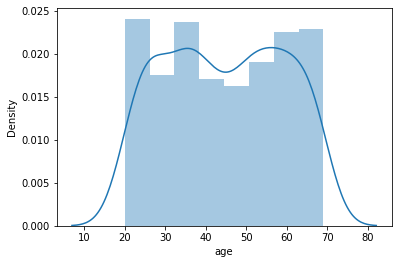

In [56]:
sns.distplot(full_data.query("premium == True")['age'])


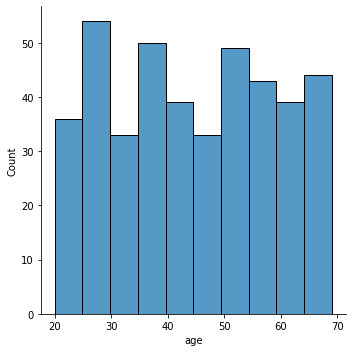

In [58]:
sns.displot(full_data.query("premium == True")['age'])

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


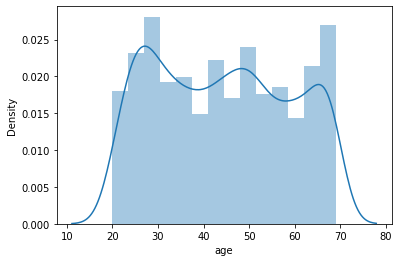

In [57]:
sns.distplot(full_data.query("premium == False")['age'])

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


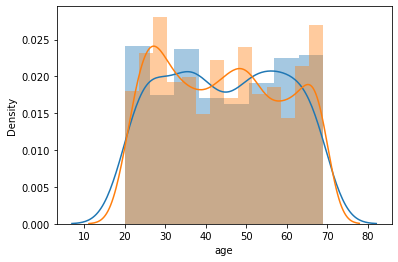

In [55]:
sns.distplot(full_data.query("premium == True")['age'])
sns.distplot(full_data.query("premium == False")['age'])

In [60]:
full_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [62]:
success_client = full_data \
    .groupby(['client'], as_index=False) \
    .aggregate({'success': 'count'}) \
    .sort_values('success', ascending=False)
success_client

,client,success
1791,61468,42
1792,61473,41
1862,64064,41
2306,78349,41
2723,92584,41
...,...,...
998,35037,1
999,35107,1
1000,35126,1
1001,35162,1


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


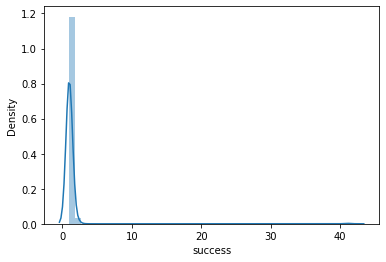

In [63]:
sns.distplot(success_client.success)

/opt/tljh/user/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


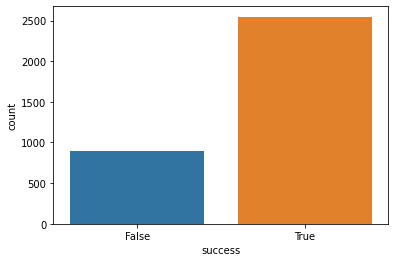

In [64]:
sns.countplot(full_data.success)

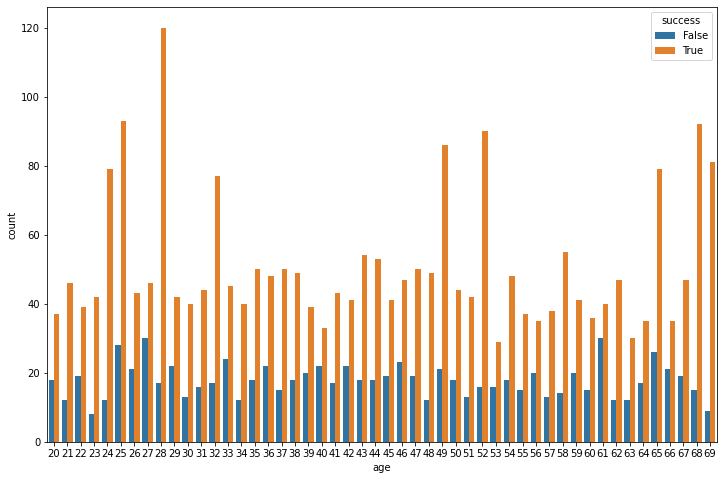

In [66]:
plt.figure(figsize=(12, 8))
sns.countplot(data=full_data, x="age", hue="success")